Numarul total al documentelor: 6560
[(0, '0.528*"1" + 0.320*"0" + 0.296*"2" + 0.218*"x" + 0.170*"k" + 0.155*"n" + 0.152*"p" + 0.135*"3" + 0.129*"use" + 0.123*"model"'), (1, '0.369*"model" + -0.306*"x" + -0.301*"1" + 0.231*"0" + -0.226*"k" + 0.207*"use" + -0.192*"n" + 0.163*"network" + 0.162*"learn" + 0.149*"imag"'), (2, '0.805*"0" + -0.210*"x" + -0.178*"model" + 0.150*"1" + -0.145*"p" + -0.119*"use" + -0.111*"learn" + -0.095*"network" + -0.091*"e" + -0.084*"n"'), (3, '0.694*"x" + -0.471*"1" + 0.322*"0" + 0.158*"f" + -0.155*"k" + 0.137*"p" + -0.124*"2" + -0.122*"algorithm" + 0.111*"z" + 0.080*"q"'), (4, '-0.415*"x" + 0.262*"n" + -0.245*"1" + 0.234*"v" + 0.227*"e" + 0.224*"j" + 0.212*"p" + 0.195*"b" + 0.192*"c" + 0.182*"r"'), (5, '-0.460*"model" + -0.358*"k" + -0.234*"p" + 0.229*"f" + 0.189*"learn" + 0.181*"w" + 0.165*"function" + 0.158*"h" + -0.156*"distribut" + 0.147*"network"'), (6, '0.761*"k" + -0.275*"1" + -0.217*"p" + -0.197*"model" + -0.175*"n" + 0.114*"cluster" + 0.109*"featur" +

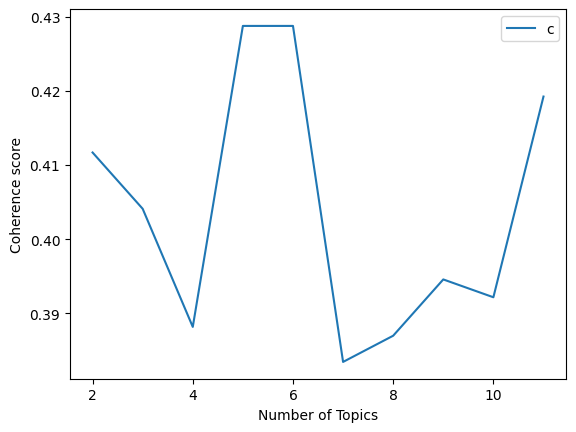

In [2]:
#import modules
import pandas as pd
import os.path
import nltk
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def incarcareDate(path,fisier):
    papers = pd.read_csv(os.path.join(path, fisier))
    listaDocumente = papers['paper_text'].tolist()
    titluri = papers['title'].tolist()
    print("Numarul total al documentelor:",len(listaDocumente))
    return listaDocumente, titluri
    
def preprocess_data(doc_set):# functie pentru a desparti in termeni textul, a sterge si se categorisesc cuvintele cu aceeasi radacina(stemming)
    # initializare regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # se creaza lista de stop words in engleza, mai exact cuvinte de legatura sau fara relevanta in mesajul textului
    en_stop = set(stopwords.words('english'))
    # pentru cuvintele regasite sub diferite forme
    p_stemmer = PorterStemmer()

    texts = []
    # loop prin document list
    for i in doc_set:
        
        raw = i.lower() # se aduce textul la lowercase
        tokens = tokenizer.tokenize(raw)
        # eliminare stop words
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stemming
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # adauga tokens listei
        texts.append(stemmed_tokens)
    return texts
    
def prepare_corpus(doc_clean):# functie cu scopul de a crea matricea termeni-documente 
    # fiecarui cuvant dintr-un document ii este atribuit un index conturandu-se astfel un dict
    dictionary = corpora.Dictionary(doc_clean)
    # crearea matricei termeni documente
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):  # cream LSA utilizand gensim

    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # genereaza modelul LSA 
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # antreneaza model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

number_of_topics=7
words=10
#listaDocumente,titluri=incarcareDate("","Articles.csv")
listaDocumente,titluri=incarcareDate("","papers.csv")
clean_text=preprocess_data(listaDocumente)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()



start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)